Seeding for reproducability



In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing Dependencies


In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


Data Curation

Upload Kaggle.json


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
#set key as environment varibable
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] =  kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip",'r') as zip_ref:
   zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot', 'Tomato___Bacterial_spot', 'Raspberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot', 'Tomato___Bacterial_spot', 'Raspberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Target_Spot', 'Tomato___Bacterial_spot', 'Raspberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)']


No of classes = 38

In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['116c65e1-9d66-4aee-b151-6b8cd8319c2d___Mt.N.V_HL 9106.JPG', 'dc89d1b9-0c5c-4178-b341-c8675d04dad3___Mt.N.V_HL 8971.JPG', '7042c2f6-b859-41ec-8ee0-b058f9e9e906___Mt.N.V_HL 6164.JPG', '0ca59865-f0d2-4863-b4d1-a6690de53a5a___Mt.N.V_HL 6025.JPG', 'f429e685-fc81-40a9-827f-30a259a9387d___Mt.N.V_HL 6183.JPG']


data Preprocessing

In [ ]:
base_dir = "plantvillage dataset/color"

(256, 256, 3)


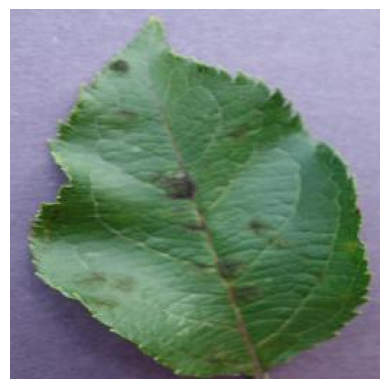

In [ ]:
image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img_size = 224
batch_size = 32

Train Test Split

In [ ]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = [img_size, img_size],
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = [img_size, img_size],
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = [img_size, img_size, 3]))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
loss = 'categorical_crossentropy',
metrics=['accuracy'])

Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 101s 69ms/step - accuracy: 0.6047 - loss: 1.6210 - val_accuracy: 0.8645 - val_loss: 0.4345
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9215 - loss: 0.2531 - val_accuracy: 0.8569 - val_loss: 0.4667
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - accuracy: 0.9649 - loss: 0.1075 - val_accuracy: 0.8897 - val_loss: 0.3951
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 145s 67ms/step - accuracy: 0.9810 - loss: 0.0579 - val_accuracy: 0.8742 - val_loss: 0.5034
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 91s 67ms/step - accuracy: 0.9840 - loss: 0.0523 - val_accuracy: 0.8781 - val_loss: 0.5839


Model Evaluation

In [ ]:
print("Evaluating Model....")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples//batch_size)
print(f"validation Accuracy:{val_accuracy*100:.2f}%")

Evaluating Model....
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8793 - loss: 0.5803
validation Accuracy:87.82%


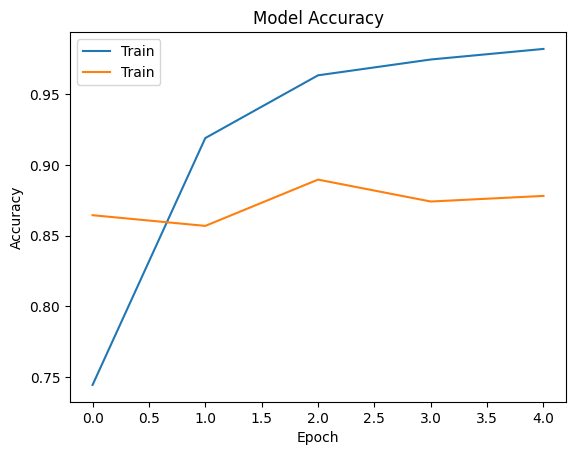

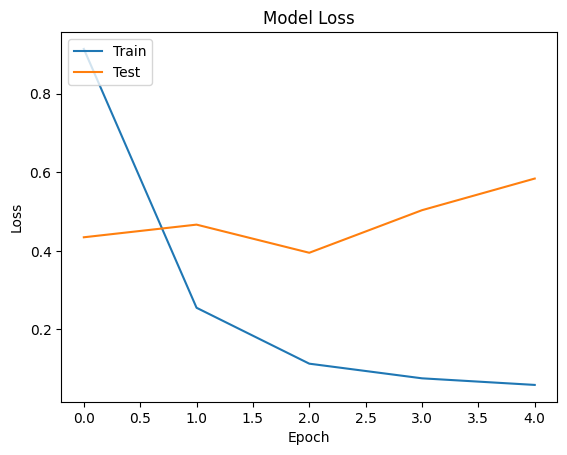

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

Build a predictive system

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
  img = Image.open(image_path)
  img = img.resize(target_size)
  img_array = np.array(img)
  imag_array = np.expand_dims(img_array, axis = 0)
  img_array = img_array.astype('float32')/255.
  return img_array

def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis = 1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
model.save('trained_disease_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
